In [4]:
import cv2


In [5]:
import matplotlib.pyplot as plt

In [6]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [7]:
 model = cv2.dnn_DetectionModel(config_file,frozen_model)

In [8]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [9]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(classLabels))

80


# read an image

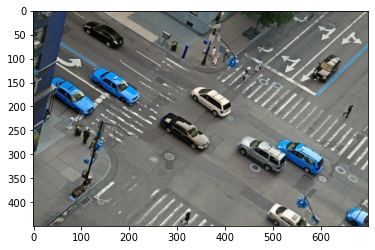

In [11]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
img = cv2.imread('obj5.jpg')
plt.imshow(img)

[1 3 3 1 3 1 3 1 1 1]


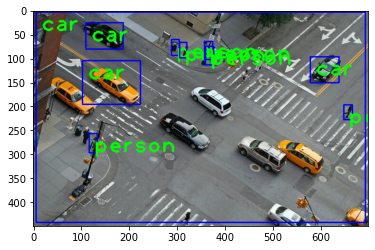

In [12]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)
font_scale = 3
font =cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3) 
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
import matplotlib.pyplot as plt
config_file = './ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = './frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(config_file,frozen_model)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    
cap=cv2.VideoCapture("side.mp4")
if not cap.isOpened():
    cap =cv2.VideoCapture("")
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
#     print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('Object Detection Tutorial',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
